In [ ]:
import csv
import random

# Open the existing CSV file for reading
with open('/content/sample_data/mail_data - mail_data.csv', 'r') as existing_file:
    reader = csv.reader(existing_file)

    spam_count = 0
    ham_count = 0

    # Separate spam and ham emails
    spam_emails = []
    ham_emails = []
    for row in reader:
        if row[0] == 'spam':
            spam_emails.append(row)
            spam_count+=1
        elif row[0] == 'ham':
            ham_emails.append(row)
            ham_count+=1

# Select an equal number of spam and ham emails
min_emails = min(len(spam_emails), len(ham_emails))
selected_spam_emails = random.sample(spam_emails, min_emails)
selected_ham_emails = random.sample(ham_emails, min_emails)

# Write the selected emails to a new CSV file
with open('balanced_emails.csv', 'w', newline='') as new_file:
    writer = csv.writer(new_file)

    # Write header
    writer.writerow(['label', 'email_text'])

    # Write selected spam emails
    for email in selected_spam_emails:
        writer.writerow(email)

    # Write selected ham emails
    for email in selected_ham_emails:
        writer.writerow(email)

print("number of spam emails in actual dataset", spam_count)
print("number of ham emails in actual dataset", ham_count)
print("New CSV file with balanced spam and ham emails created successfully!")
print("number of spam emails", len(selected_spam_emails))
print("Number of ham emails", len(selected_ham_emails))


number of spam emails in actual dataset 747
number of ham emails in actual dataset 4825
New CSV file with balanced spam and ham emails created successfully!
number of spam emails 747
Number of ham emails 747


In [ ]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
filename = '/content/balanced_emails.csv'
df = pd.read_csv(filename)
print(df.head(10))
print(df.tail(10))

  label                                         email_text
0  spam  Hello darling how are you today? I would love ...
1  spam  U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
2  spam  No 1 POLYPHONIC tone 4 ur mob every week! Just...
3  spam  money!!! you r a lucky winner ! 2 claim your p...
4  spam  A £400 XMAS REWARD IS WAITING FOR YOU! Our com...
5  spam  Monthly password for wap. mobsi.com is 391784....
6  spam  Bored housewives! Chat n date now! 0871750.77....
7  spam  You have WON a guaranteed £1000 cash or a £200...
8  spam  Kit Strip - you have been billed 150p. Netcoll...
9  spam  Congratulations ur awarded either £500 of CD g...
     label                                         email_text
1484   ham  its cool but tyler had to take off so we're go...
1485   ham                    You see the requirements please
1486   ham                   I'm job profile seems like bpo..
1487   ham                       I see the letter B on my car
1488   ham  Oh ! A half hour is much long

In [ ]:
import csv
import random

# Open the existing CSV file for reading
with open('/content/sample_data/mail_data - mail_data.csv', 'r') as existing_file:
    reader = csv.reader(existing_file)

    # Reset the file pointer to the beginning of the file
    existing_file.seek(0)

    # Separate spam and ham emails again for balanced selection
    spam_emails = []
    ham_emails = []
    for row in reader:
        if row[0] == 'spam':
            spam_emails.append(row)
        elif row[0] == 'ham':
            ham_emails.append(row)

# Select an equal number of spam and ham emails
min_emails = min(len(spam_emails), len(ham_emails))
selected_spam_emails = random.sample(spam_emails, min_emails)
selected_ham_emails = random.sample(ham_emails, min_emails)

# Interleave spam and ham emails
balanced_dataset = []
for spam_email, ham_email in zip(selected_spam_emails, selected_ham_emails):
    balanced_dataset.append(spam_email)
    balanced_dataset.append(ham_email)

random.shuffle(balanced_dataset)


# Write the shuffled emails to a new CSV file
with open('balanced_and_shuffled_emails.csv', 'w', newline='') as new_file:
    writer = csv.writer(new_file)

    # Write header
    writer.writerow(['label', 'email_text'])

    # Write shuffled emails
    for email in balanced_dataset:
        writer.writerow(email)

# Print the number of spam and ham emails added to the new CSV file
print("\nBalanced dataset shuffled and written to 'balanced_and_shuffled_emails.csv' successfully!")
print("number of spam emails", len(selected_spam_emails))
print("Number of ham emails", len(selected_ham_emails))



Balanced dataset shuffled and written to 'balanced_and_shuffled_emails.csv' successfully!
number of spam emails 747
Number of ham emails 747


In [ ]:
import pandas as pd
filename = '/content/balanced_and_shuffled_emails.csv'
df = pd.read_csv(filename)
print(df.head(10))

  label                                         email_text
0   ham                  Ofcourse I also upload some songs
1   ham          Really? I crashed out cuddled on my sofa.
2   ham                             I liked the new mobile
3   ham  wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
4  spam  URGENT!: Your Mobile No. was awarded a £2,000 ...
5   ham  I have a rather prominent bite mark on my righ...
6  spam  SMS. ac JSco: Energy is high, but u may not kn...
7  spam  Double mins and txts 4 6months FREE Bluetooth ...
8  spam  LORD OF THE RINGS:RETURN OF THE KING in store ...
9  spam  Monthly password for wap. mobsi.com is 391784....


In [ ]:
styled_df = df.head(10)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "red")]}
])
styled_df

,label,email_text
0,ham,Ofcourse I also upload some songs
1,ham,Really? I crashed out cuddled on my sofa.
2,ham,I liked the new mobile
3,ham,"wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine ""KUDI""yarasu dhina vaazhthukkal. .."
4,spam,"URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU"
5,ham,I have a rather prominent bite mark on my right cheek
6,spam,"SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO"
7,spam,"Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX"
8,spam,LORD OF THE RINGS:RETURN OF THE KING in store NOW!REPLY LOTR by 2 June 4 Chance 2 WIN LOTR soundtrack CDs StdTxtRate. Reply STOP to end txts
9,spam,Monthly password for wap. mobsi.com is 391784. Use your wap phone not PC.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       1494 non-null   object
 1   email_text  1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


In [ ]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [ ]:
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 53.34788937409025
percentage of 1 : 46.652110625909756


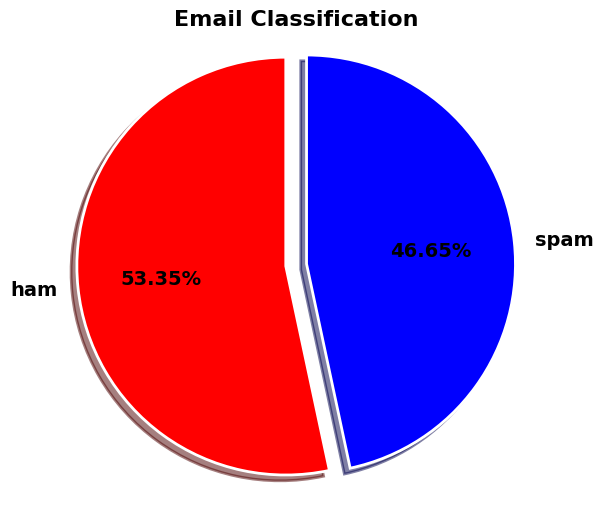

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
colors = ['#FF0000', '#0000FF']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor('white')

values = df['label'].value_counts()
total = values.sum()

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    tokens = text.split()
    # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\d', '', text)
    # Remove digits
    text = re.sub(r'[^\w\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

df['transformed_email_text'] = df['email_text'].apply(preprocess_text)

# Display the original and transformed data
print(df[['label', 'email_text', 'transformed_email_text']].head(10))


  label                                         email_text  \
0   ham                  Ofcourse I also upload some songs   
1   ham          Really? I crashed out cuddled on my sofa.   
2   ham                             I liked the new mobile   
3   ham  wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...   
4  spam  URGENT!: Your Mobile No. was awarded a £2,000 ...   
5   ham  I have a rather prominent bite mark on my righ...   
6  spam  SMS. ac JSco: Energy is high, but u may not kn...   
7  spam  Double mins and txts 4 6months FREE Bluetooth ...   
8  spam  LORD OF THE RINGS:RETURN OF THE KING in store ...   
9  spam  Monthly password for wap. mobsi.com is 391784....   

                              transformed_email_text  
0                           ofcours also upload song  
1                            realli crash cuddl sofa  
2                                     like new mobil  
3  wiskey brandi rum gin beer vodka scotch shampa...  
4  urgent mobil award bonu caller prize nd

In [ ]:
styled_df = df.head(10)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "red")]}
])
styled_df

,label,email_text,transformed_email_text
0,ham,Ofcourse I also upload some songs,ofcours also upload song
1,ham,Really? I crashed out cuddled on my sofa.,realli crash cuddl sofa
2,ham,I liked the new mobile,like new mobil
3,ham,"wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine ""KUDI""yarasu dhina vaazhthukkal. ..",wiskey brandi rum gin beer vodka scotch shampain wine kudi yarasu dhina vaazhthukk
4,spam,"URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU",urgent mobil award bonu caller prize nd attempt contact call boxqu
5,ham,I have a rather prominent bite mark on my right cheek,rather promin bite mark right cheek
6,spam,"SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO",sm ac jsco energi high u may know channel day ur leadership skill r strong psychic repli an w question end repli end jsco
7,spam,"Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX",doubl min txt month free bluetooth orang avail soni nokia motorola phone call mobileupd calloptout ndx
8,spam,LORD OF THE RINGS:RETURN OF THE KING in store NOW!REPLY LOTR by 2 June 4 Chance 2 WIN LOTR soundtrack CDs StdTxtRate. Reply STOP to end txts,lord ring return king store repli lotr june chanc win lotr soundtrack cd stdtxtrate repli stop end txt
9,spam,Monthly password for wap. mobsi.com is 391784. Use your wap phone not PC.,monthli password wap mobsi com use wap phone pc


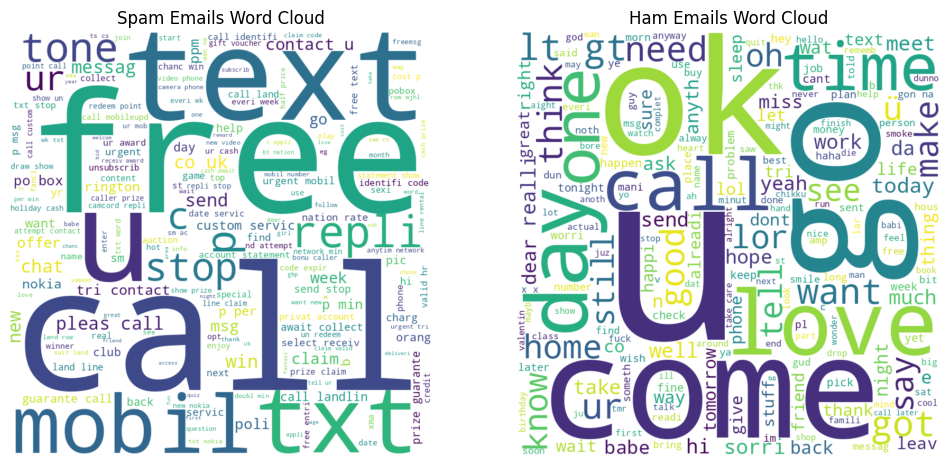

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_emails = df[df['label'] == 'spam']['transformed_email_text']
ham_emails = df[df['label'] == 'ham']['transformed_email_text']

# Generate word clouds for spam and ham emails
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(spam_emails))
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(ham_emails))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Emails Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Emails Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


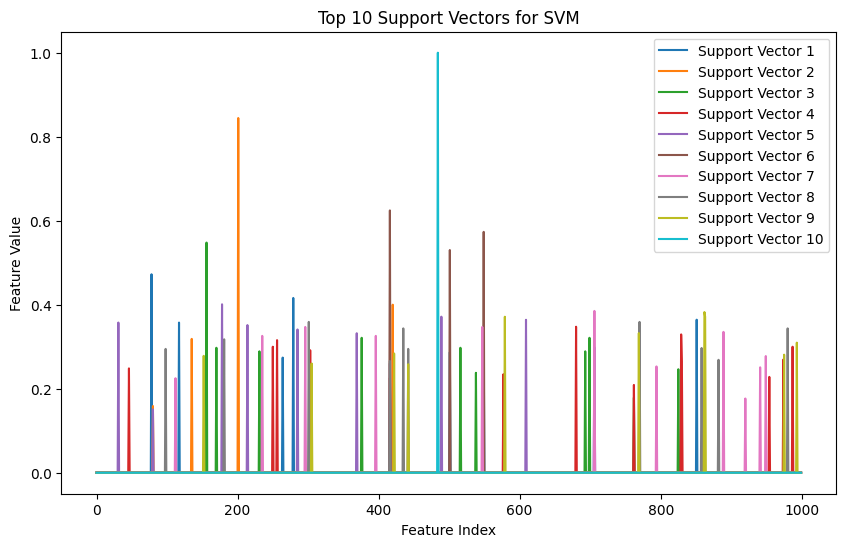

In [ ]:
# Fit SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Get the indices of top 10 support vectors
top_indices = np.argsort(np.abs(svm_classifier.decision_function(X_train_tfidf)))[:10]

# Get the corresponding feature vectors
top_support_vectors = X_train_tfidf[top_indices]

# Plotting the top 10 support vectors
plt.figure(figsize=(10, 6))
plt.title('Top 10 Support Vectors for SVM')
for i, vector in enumerate(top_support_vectors):
    plt.plot(vector.toarray()[0], label=f'Support Vector {i+1}')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

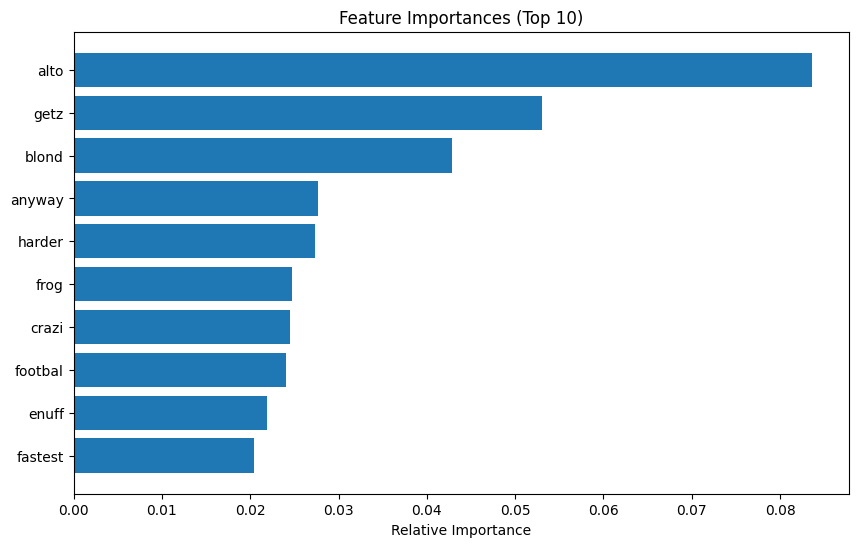

In [ ]:
# Feature importance for Random Forest
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # top 20 features

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Top 10)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming df is already defined and contains 'transformed_email_text' and 'label' columns

# Split the dataset into training and testing sets
X = df['transformed_email_text']  # Features
y = df['label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Naive Bayes Classifier Accuracy: 0.9309090909090909

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0     0.9139    0.9583    0.9356       144
           1     0.9516    0.9008    0.9255       131

    accuracy                         0.9309       275
   macro avg     0.9328    0.9295    0.9305       275
weighted avg     0.9319    0.9309    0.9308       275



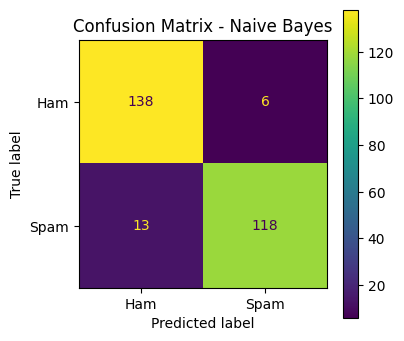

In [ ]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions using Naive Bayes classifier
nb_y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate Naive Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred, digits=4))  # Specify digits=4 to display up to 4 decimal points

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_y_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Ham', 'Spam'])
disp_nb.plot()
plt.title('Confusion Matrix - Naive Bayes')
plt.gcf().set_size_inches(4, 4)  # Reducing the size of the confusion matrix plot
plt.show()



Support Vector Machine (SVM) Classifier Accuracy: 0.9381818181818182

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0     0.9045    0.9861    0.9435       144
           1     0.9831    0.8855    0.9317       131

    accuracy                         0.9382       275
   macro avg     0.9438    0.9358    0.9376       275
weighted avg     0.9419    0.9382    0.9379       275



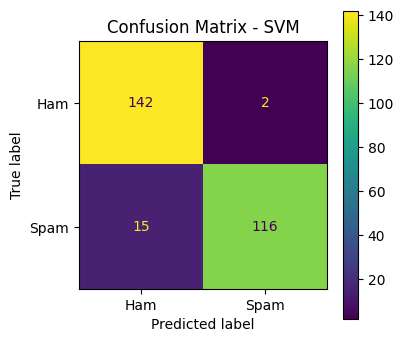

In [ ]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions using SVM classifier
svm_y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nSupport Vector Machine (SVM) Classifier Accuracy:", svm_accuracy)
print("\nSupport Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_y_pred, digits=4))  # Specify digits=4 to display up to 4 decimal points

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Ham', 'Spam'])
disp_svm.plot()
plt.title('Confusion Matrix - SVM')
plt.gcf().set_size_inches(4, 4)  # Reducing the size of the confusion matrix plot
plt.show()


Random Forest Classifier Accuracy: 0.96

Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9346    0.9931    0.9630       144
           1     0.9918    0.9237    0.9565       131

    accuracy                         0.9600       275
   macro avg     0.9632    0.9584    0.9597       275
weighted avg     0.9619    0.9600    0.9599       275



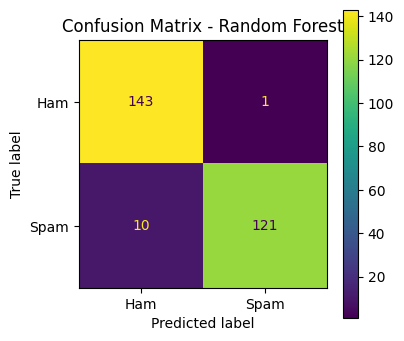

In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions using Random Forest classifier
rf_y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, digits=4))  # Specify digits=4 to display up to 4 decimal points

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ham', 'Spam'])
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.gcf().set_size_inches(4, 4)  # Reducing the size of the confusion matrix plot
plt.show()

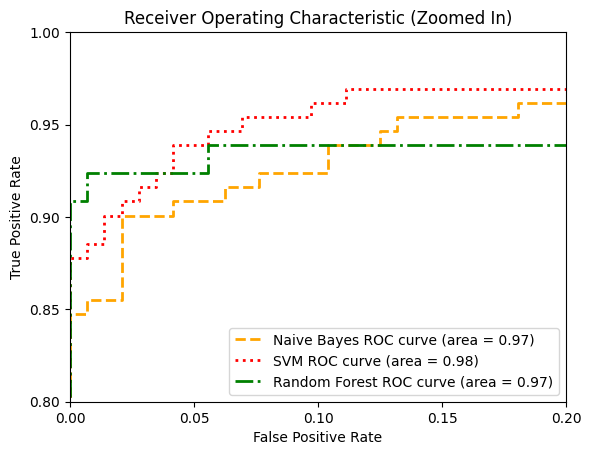

In [ ]:
# ROC curve for Naive Bayes
nb_y_pred_prob = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_pred_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC curve for SVM
svm_y_pred_prob = svm_classifier.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# ROC curve for Random Forest
rf_y_pred_prob = rf_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, linestyle='--', label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle=':', label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, linestyle='-.', label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 0.2])  # Zooming in on the FPR axis
plt.ylim([0.8, 1.0])  # Zooming in on the TPR axis
plt.xticks(np.arange(0.0, 0.21, step=0.05))  # Finer ticks on the x-axis
plt.yticks(np.arange(0.8, 1.05, step=0.05))  # Finer ticks on the y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zoomed In)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

def calculate_evaluation_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Calculate evaluation metrics for each classifier
nb_metrics = calculate_evaluation_metrics(y_test, y_pred_nb)
svm_metrics = calculate_evaluation_metrics(y_test, y_pred_svm)
rf_metrics = calculate_evaluation_metrics(y_test, y_pred_rf)

# Create DataFrame
metrics_df = pd.DataFrame([nb_metrics, svm_metrics, rf_metrics], index=['Naive Bayes', 'Support Vector Machine', 'Random Forest'])

# Calculate evaluation metrics for each classifier
nb_metrics = calculate_evaluation_metrics(y_test, y_pred_nb)
svm_metrics = calculate_evaluation_metrics(y_test, y_pred_svm)
rf_metrics = calculate_evaluation_metrics(y_test, y_pred_rf)

# Arrange metrics into a list of dictionaries
metrics_list = [
    {'Classifier': 'Naive Bayes', **nb_metrics},
    {'Classifier': 'Support Vector Machine', **svm_metrics},
    {'Classifier': 'Random Forest', **rf_metrics}
]

# Print comparison table
print("Evaluation metrics comparision")
print(tabulate(metrics_list, headers="keys", tablefmt="grid"))


Evaluation metrics comparision
+------------------------+------------+-------------+----------+------------+-----------+
| Classifier             |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |
+========================+============+=============+==========+============+===========+
| Naive Bayes            |   0.930909 |    0.951613 | 0.900763 |   0.92549  |  0.929548 |
+------------------------+------------+-------------+----------+------------+-----------+
| Support Vector Machine |   0.938182 |    0.983051 | 0.885496 |   0.931727 |  0.935804 |
+------------------------+------------+-------------+----------+------------+-----------+
| Random Forest          |   0.96     |    0.991803 | 0.923664 |   0.956522 |  0.95836  |
+------------------------+------------+-------------+----------+------------+-----------+


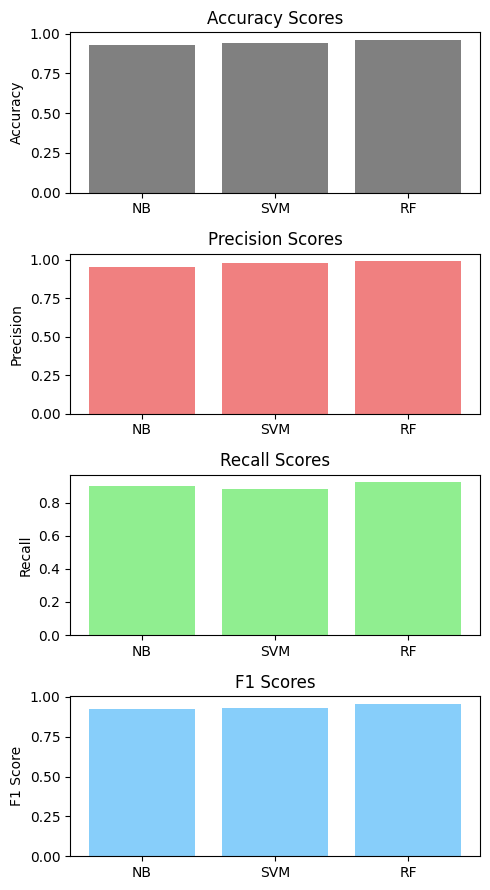

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for bar charts
classifiers = ['NB', 'SVM', 'RF']
accuracy_scores = [nb_metrics['Accuracy'], svm_metrics['Accuracy'], rf_metrics['Accuracy']]
precision_scores = [nb_metrics['Precision'], svm_metrics['Precision'], rf_metrics['Precision']]
recall_scores = [nb_metrics['Recall'], svm_metrics['Recall'], rf_metrics['Recall']]
f1_scores = [nb_metrics['F1 Score'], svm_metrics['F1 Score'], rf_metrics['F1 Score']]

# Plot bar charts for evaluation metrics
fig, axs = plt.subplots(4, 1, figsize=(5, 9))

# Bar chart for accuracy
axs[0].bar(classifiers, accuracy_scores, color='grey')
axs[0].set_title('Accuracy Scores')
axs[0].set_ylabel('Accuracy')

# Bar chart for precision
axs[1].bar(classifiers, precision_scores, color='lightcoral')
axs[1].set_title('Precision Scores')
axs[1].set_ylabel('Precision')

# Bar chart for recall
axs[2].bar(classifiers, recall_scores, color='lightgreen')
axs[2].set_title('Recall Scores')
axs[2].set_ylabel('Recall')

# Bar chart for F1-score
axs[3].bar(classifiers, f1_scores, color='lightskyblue')
axs[3].set_title('F1 Scores')
axs[3].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Train a Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X, y)

# Function to classify a given message
def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

# Example usage
message = "URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU"
classification = classify_message(message)
print("Classification:", classification)


Classification: spam


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Train an SVM classifier
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))  # Linear kernel for simplicity
model.fit(X, y)

# Function to classify a given message
def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

# Example usage
message = "URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU"
classification = classify_message(message)
print("Classification:", classification)


Classification: spam


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Train a Random Forest classifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X, y)

# Function to classify a given message
def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

# Example usage
message = "URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU"
classification = classify_message(message)
print("Classification:", classification)


Classification: spam


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Train a Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X, y)

# Function to classify a given message
def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

random_messages = [
    "Click here to claim your prize!",
    "Hey, what's up? Want to grab lunch?",
    "Buy one, get one free offer!",
    "Free vacation trip by clicking the link below",
    "Meeting at 3 PM in the conference room.",
    "uscis@gmail.com",
    "coursera@m.learn.coursera.org",
    "http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO"
]

print("Classification using Naive Bayes\n\n")
# Classify each random message
for message in random_messages:
    classification = classify_message(message)
    print("Message:", message)
    print("Classification:", classification)
    print()

Classification using Naive Bayes


Message: Click here to claim your prize!
Classification: spam

Message: Hey, what's up? Want to grab lunch?
Classification: ham

Message: Buy one, get one free offer!
Classification: ham

Message: Free vacation trip by clicking the link below
Classification: spam

Message: Meeting at 3 PM in the conference room.
Classification: spam

Message: uscis@gmail.com
Classification: spam

Message: coursera@m.learn.coursera.org
Classification: spam

Message: http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO
Classification: spam



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

# Example random messages
random_messages = [
    "Click here to claim your prize!",
    "Hey, what's up? Want to grab lunch?",
    "Buy one, get one free offer!",
    "Free vacation trip by clicking the link below",
    "Meeting at 3 PM in the conference room.",
    "uscis@gmail.com",
    "coursera@m.learn.coursera.org",
    "http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO"
]
print("Classification using SVM\n\n")
# Classify each random message
for message in random_messages:
    classification = classify_message(message)
    print("Message:", message)
    print("Classification:", classification)
    print()


Classification using SVM


Message: Click here to claim your prize!
Classification: spam

Message: Hey, what's up? Want to grab lunch?
Classification: ham

Message: Buy one, get one free offer!
Classification: ham

Message: Free vacation trip by clicking the link below
Classification: spam

Message: Meeting at 3 PM in the conference room.
Classification: spam

Message: uscis@gmail.com
Classification: spam

Message: coursera@m.learn.coursera.org
Classification: spam

Message: http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO
Classification: spam



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Train a Random Forest classifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X, y)

# Function to classify a given message
def classify_message(message):
    label = model.predict([message])[0]
    if label == 1:
      return "spam"
    return "ham"

random_messages = [
    "Click here to claim your prize!",
    "Hey, what's up? Want to grab lunch?",
    "Buy one, get one free offer!",
    "Free vacation trip by clicking the link below",
    "Meeting at 3 PM in the conference room.",
    "uscis@gmail.com",
    "coursera@m.learn.coursera.org",
    "http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO"
]
print("Classification using Random Forest\n\n")
# Classify each random message
for message in random_messages:
    classification = classify_message(message)
    print("Message:", message)
    print("Classification:", classification)
    print()

Classification using Random Forest


Message: Click here to claim your prize!
Classification: spam

Message: Hey, what's up? Want to grab lunch?
Classification: ham

Message: Buy one, get one free offer!
Classification: spam

Message: Free vacation trip by clicking the link below
Classification: ham

Message: Meeting at 3 PM in the conference room.
Classification: ham

Message: uscis@gmail.com
Classification: ham

Message: coursera@m.learn.coursera.org
Classification: ham

Message: http://pop.higherincomejobsfast.com/croute/rsp.jsp?u===DW5jSEF0RJoW1KiH1HMESKNpRKG1yJqqHIOpRJMWSHrIxIGuSHHOxRPkSIq5yFEWHHnEIJJtHDZASKLgyDFASFtVxKWEyDIyIJMuxITSyIoE0Y5tPYvNxVgpSY1NvILukDpyHJESyJHOkEDSSJqA1Tr1SQRbDEBjkUINEQpLRKoqESMfuO
Classification: spam

